# Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Define the parameters used to create the plots
rc = {'figure.figsize':(10,8),
      'axes.facecolor':'white',
      'figure.facecolor':'white',
      'axes.grid' : False,
      'font.size' : 20,    
      'font.sans-serif': 'Arial',
      'font.family': 'sans-serif',
      'svg.fonttype' : 'none' }

# Retina-enriched exons

In [3]:
retina_exons = pd.read_csv('../predictions/retina_exons_predictions.tsv', sep = '\t')

# Apply the function to the acceptor and donor columns
for name in retina_exons.columns[4:7]:
    retina_exons[name] = pd.to_numeric(retina_exons[name].str.split().str[1])
for name in retina_exons.columns[7:10]:
    retina_exons[name] = retina_exons[name].apply(lambda x: pd.to_numeric(x.strip('[]').split()[-1]))
    
# Rename the columns
retina_exons.rename(columns={'retina_acceptor': 'Retina acceptor', 'gtex_acceptor' : 'GTEx acceptor', 'gtex2_acceptor' : 'GTEx standard acceptor',
                             'retina_donor' : 'Retina donor', 'gtex_donor' : 'GTEx donor', 'gtex2_donor' : 'GTEx standard donor'}, inplace=True)

retina_exons.head()

,chr,start,end,strand,Retina acceptor,GTEx acceptor,GTEx standard acceptor,Retina donor,GTEx donor,GTEx standard donor
0,chr17,170631,170657,-1.0,0.06,0.20,0.16,0.18,0.23,0.14
1,chr7,38464089,38464097,-1.0,0.00,0.00,0.00,0.00,0.00,0.00
2,chr17,7655236,7655256,1.0,0.73,0.80,0.65,0.82,0.81,0.72
3,chr2,25111072,25111095,1.0,0.04,0.04,0.02,0.04,0.03,0.02
4,chr19,32380609,32380620,1.0,0.63,0.22,0.51,0.42,0.18,0.19


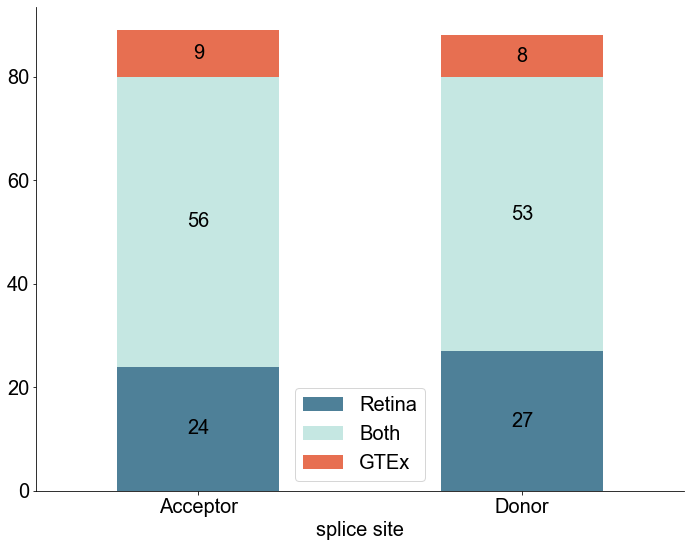

In [9]:
# stacked barplot

retina_sas = retina_exons[retina_exons['Retina acceptor'] >= 0.22]
gtex_sas = retina_exons[retina_exons['GTEx standard acceptor'] >= 0.39]
retina_sas = set(row['chr'] + ':' + str(row['start']) for index, row in retina_sas.iterrows())
gtex_sas = set(row['chr'] + ':' + str(row['start']) for index, row in gtex_sas.iterrows())

retina_sds = retina_exons[retina_exons['Retina donor'] >= 0.22]
gtex_sds = retina_exons[retina_exons['GTEx standard donor'] >= 0.38]
retina_sds = set(row['chr'] + ':' + str(row['start']) for index, row in retina_sds.iterrows())
gtex_sds = set(row['chr'] + ':' + str(row['start']) for index, row in gtex_sds.iterrows())

df = pd.DataFrame([['Acceptor',len(retina_sas - gtex_sas), len(retina_sas & gtex_sas), len(gtex_sas - retina_sas) ],
                   ['Donor', len(retina_sds - gtex_sds), len(retina_sds & gtex_sds), len(gtex_sds - retina_sds)]],
                   columns = ['splice site', 'Retina', 'Both', 'GTEx'])

plt.rcParams.update(rc)

# Create bar plot
ax = df.plot(x='splice site', kind='bar', stacked=True, color = ['#4E8098', '#C5E7E2', '#E76F51'])

# Display the plot
plt.xticks(rotation=0, ha='center', rotation_mode='anchor')

# Add data labels
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width / 2, 
            y + height / 2, 
            '{:.0f}'.format(height), 
            ha='center', 
            va='center')

# Remove black x and y axis line
sns.despine(bottom = False, left = False)

plt.tight_layout()  # Adjust layout to prevent clipping of labels
#plt.savefig('retina_exons_stacked.png',  bbox_inches='tight', dpi = 300)
plt.show()


# Retina-enriched exons not in training data

In [16]:
sas  = pd.read_csv('../predictions/retina_sas_predictions.tsv', sep = '\t')
sds  = pd.read_csv('../predictions/retina_sds_predictions.tsv', sep = '\t')

sas = sas.drop_duplicates()
sds = sds.drop_duplicates()

print(len(sas))
print(len(sds))

115
107


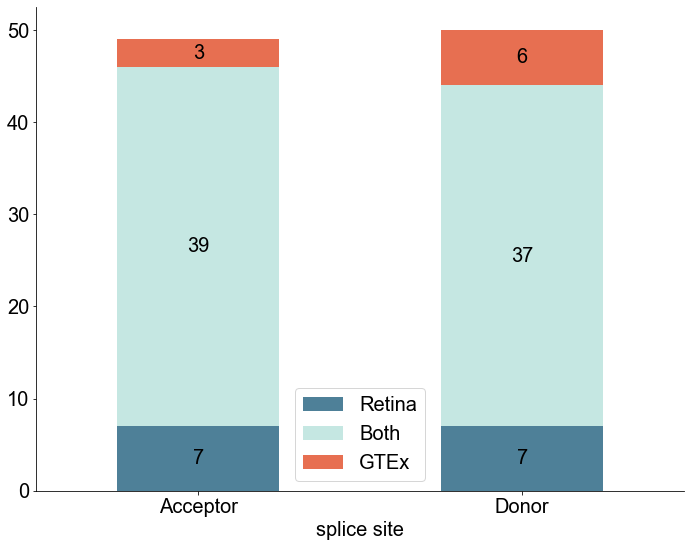

In [13]:
# stacked barplot
retina_sas = sas[sas['retina'] >= 0.22]
gtex_sas = sas[sas['gtex'] >= 0.39]
retina_sas = set(row['chr'] + ':' + str(row['position']) for index, row in retina_sas.iterrows())
gtex_sas = set(row['chr'] + ':' + str(row['position']) for index, row in gtex_sas.iterrows())

retina_sds = sds[sds['retina'] >= 0.22]
gtex_sds = sds[sds['gtex'] >= 0.38]
retina_sds = set(row['chr'] + ':' + str(row['position']) for index, row in retina_sds.iterrows())
gtex_sds = set(row['chr'] + ':' + str(row['position']) for index, row in gtex_sds.iterrows())

df = pd.DataFrame([['Acceptor',len(retina_sas - gtex_sas), len(retina_sas & gtex_sas), len(gtex_sas - retina_sas) ],
                   ['Donor', len(retina_sds - gtex_sds), len(retina_sds & gtex_sds), len(gtex_sds - retina_sds)]],
                   columns = ['splice site', 'Retina', 'Both', 'GTEx'])

plt.rcParams.update(rc)

# Create bar plot
ax = df.plot(x='splice site', kind='bar', stacked=True, color = ['#4E8098', '#C5E7E2', '#E76F51'])

# Display the plot
plt.xticks(rotation=0, ha='center', rotation_mode='anchor')

# Add data labels
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width / 2, 
            y + height / 2, 
            '{:.0f}'.format(height), 
            ha='center', 
            va='center')

# Remove black x and y axis line
sns.despine(bottom = False, left = False)

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig('retina_exons_stacked.svg',  bbox_inches='tight', dpi = 300)
plt.show()


# Pacbio predictions

In [10]:
def create_barplot_pacbio(df, thresholds, ylabel, filename):
    names = df.columns[2:]

    counts = []
    for name, threshold in zip(names, thresholds):
        counts.append(above_threshold(df, name, threshold))

    # Create bar plot
    plt.rcParams.update(rc)

    bars = plt.bar(names, counts, color=['#4E8098', '#E76F51', '#E76F51'])

    # Add labels and title
    plt.xlabel('Model')
    plt.ylabel(ylabel)

    # Display the plot
    plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

    plt.xticks(names, ['Retina', 'GTEx', 'GTEx standard'])


    # Remove black x and y axis line
    sns.despine(bottom = False, left = False)

    # Add text labels on top of the bars
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                count, ha='center', va='bottom')

    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.savefig(filename,  bbox_inches='tight', dpi = 300)
    plt.show()

All acceptor sites:  11269
Number of acceptor sites without a prediction:  3185


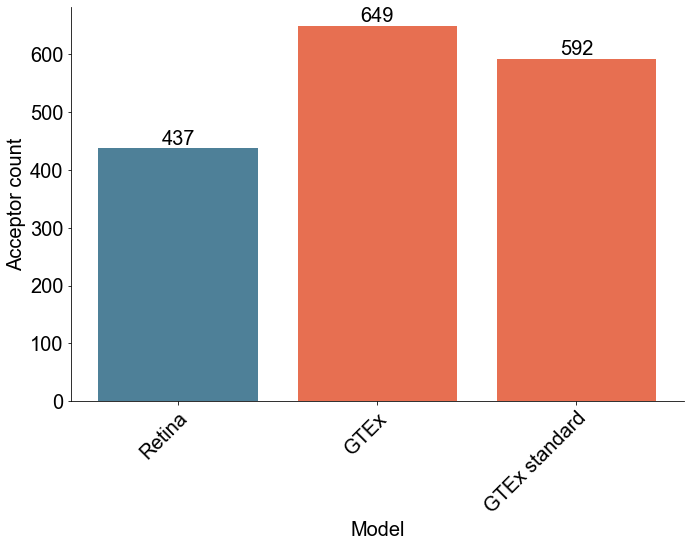

In [11]:
pacbio_acceptors = pd.read_csv('../predictions/pacbio_acceptors_predictions.tsv', sep = '\t')
for name in pacbio_acceptors.columns[2:]:
    pacbio_acceptors[name] = pd.to_numeric(pacbio_acceptors[name].str.split().str[1])

# Drop acceptor sites without a prediction
all_acceptors = len(pacbio_acceptors)
pacbio_acceptors = pacbio_acceptors.dropna()
print('All acceptor sites: ', all_acceptors)
print('Number of acceptor sites without a prediction: ', all_acceptors - len(pacbio_acceptors))

create_barplot_pacbio(pacbio_acceptors, [0.22,0.39, 0.39], 'Acceptor count', 'Pacbio_acceptor.png')

All acceptor sites:  10577
Number of acceptor sites without a prediction:  3179


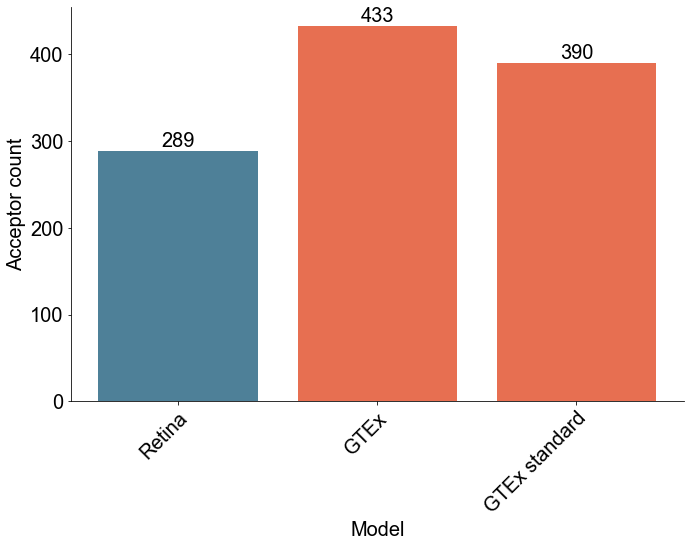

In [18]:
pacbio_acceptors = pd.read_csv('../predictions/pacbio_acceptors_not_in_train_predictions.tsv', sep = '\t')
for name in pacbio_acceptors.columns[2:]:
    pacbio_acceptors[name] = pd.to_numeric(pacbio_acceptors[name].str.split().str[1])

# Drop acceptor sites without a prediction
all_acceptors = len(pacbio_acceptors)
pacbio_acceptors = pacbio_acceptors.dropna()
print('All acceptor sites: ', all_acceptors)
print('Number of acceptor sites without a prediction: ', all_acceptors - len(pacbio_acceptors))

create_barplot_pacbio(pacbio_acceptors, [0.22,0.39, 0.39], 'Acceptor count', 'Pacbio_acceptor_notintrain.png')

In [85]:
pacbio_donors = pd.read_csv('../predictions/pacbio_donors_predictions.tsv', sep = '\t')


In [ ]:

# Drop acceptor sites without a prediction
all_donors = len(pacbio_donors)
pacbio_donors = pacbio_donors[pacbio_donors.apply(lambda row: row[pacbio_donors.columns[2]] != '[]', axis=1)]
print('All donor sites: ', all_donors)
print('Number of donor sites without a prediction: ', all_donors - len(pacbio_donors))

for name in pacbio_donors.columns[2:]:
    pacbio_donors[name] = pacbio_donors[name].apply(lambda x: pd.to_numeric(x.strip('[]').split()[-1]))


create_barplot_pacbio(pacbio_donors, [0.22,0.38, 0.38], 'Donor count', 'Pacbio_donor.png')


All donor sites:  11032
Number of donor sites without a prediction:  2306


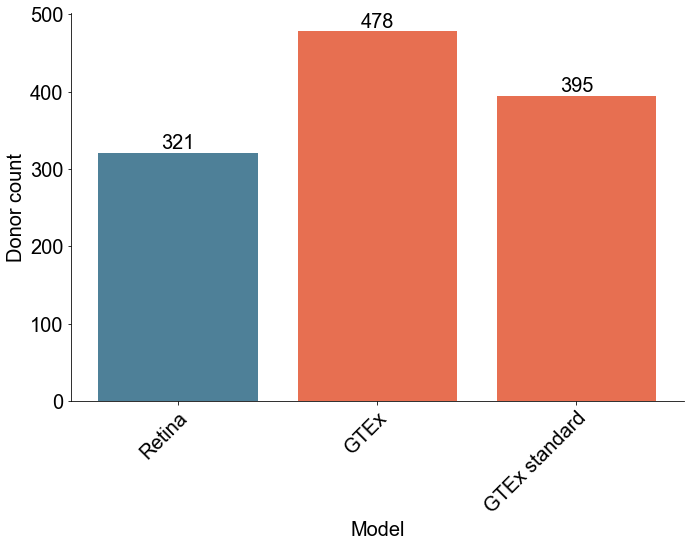

In [19]:
pacbio_donors = pd.read_csv('../predictions/pacbio_donors_not_in_train_predictions.tsv', sep = '\t')

# Drop acceptor sites without a prediction
all_donors = len(pacbio_donors)
pacbio_donors = pacbio_donors[pacbio_donors.apply(lambda row: row[pacbio_donors.columns[2]] != '[]', axis=1)]
print('All donor sites: ', all_donors)
print('Number of donor sites without a prediction: ', all_donors - len(pacbio_donors))

for name in pacbio_donors.columns[2:]:
    pacbio_donors[name] = pacbio_donors[name].apply(lambda x: pd.to_numeric(x.strip('[]').split()[-1]))


create_barplot_pacbio(pacbio_donors, [0.22,0.38, 0.38], 'Donor count', 'Pacbio_donor_notintrain.png')


In [101]:
pacbio_acceptors = pd.read_csv('../predictions/pacbio_acceptors_predictions.tsv', sep = '\t')
for name in pacbio_acceptors.columns[2:]:
    pacbio_acceptors[name] = pd.to_numeric(pacbio_acceptors[name].str.split().str[1])
pacbio_acceptors = pacbio_acceptors.dropna()
pacbio_acceptors.head()

pacbio_donors = pd.read_csv('../predictions/pacbio_donors_predictions.tsv', sep = '\t')
pacbio_donors = pacbio_donors[pacbio_donors.apply(lambda row: row[pacbio_donors.columns[2]] != '[]', axis=1)]
for name in pacbio_donors.columns[2:]:
    pacbio_donors[name] = pacbio_donors[name].apply(lambda x: pd.to_numeric(x.strip('[]').split()[-1]))
pacbio_donors = pacbio_donors.dropna()
pacbio_donors.head()

,chr,start,SpliceAI_dropout_freeze_retina_all,SpliceAI_dropout0.3_gtex_all,SpliceAI_standard_gtex
0,chr16,28610130,0.0,0.0,0.0
1,chr12,113392452,0.0,0.0,0.0
2,chr9,27357160,0.0,0.0,0.0
3,chr14,57142173,0.0,0.0,0.0
5,chr16,88809470,0.0,0.0,0.0


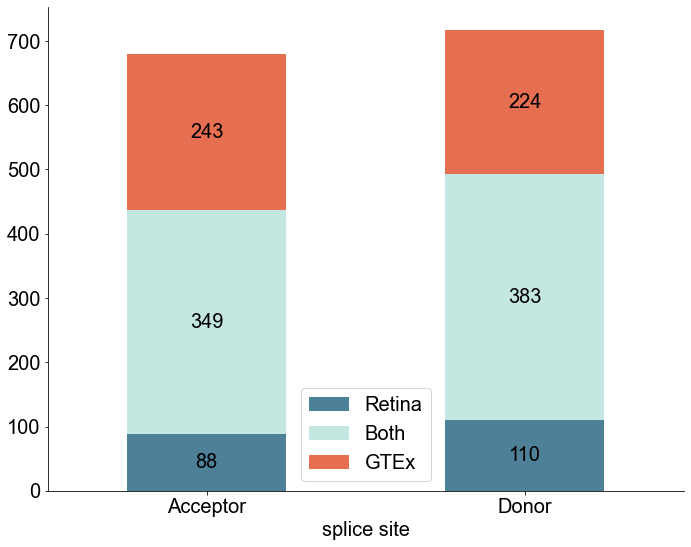

In [103]:
# stacked barplot

retina_sas = pacbio_acceptors[pacbio_acceptors['SpliceAI_dropout_freeze_retina_all'] >= 0.22]
gtex_sas = pacbio_acceptors[pacbio_acceptors['SpliceAI_standard_gtex'] >= 0.39]
retina_sas = set(row['chr'] + ':' + str(row['start']) for index, row in retina_sas.iterrows())
gtex_sas = set(row['chr'] + ':' + str(row['start']) for index, row in gtex_sas.iterrows())

retina_sds = pacbio_donors[pacbio_donors['SpliceAI_dropout_freeze_retina_all'] >= 0.22]
gtex_sds = pacbio_donors[pacbio_donors['SpliceAI_standard_gtex'] >= 0.38]
retina_sds = set(row['chr'] + ':' + str(row['start']) for index, row in retina_sds.iterrows())
gtex_sds = set(row['chr'] + ':' + str(row['start']) for index, row in gtex_sds.iterrows())

df = pd.DataFrame([['Acceptor',len(retina_sas - gtex_sas), len(retina_sas & gtex_sas), len(gtex_sas - retina_sas) ],
                   ['Donor', len(retina_sds - gtex_sds), len(retina_sds & gtex_sds), len(gtex_sds - retina_sds)]],
                   columns = ['splice site', 'Retina', 'Both', 'GTEx'])

# Create bar plot
ax = df.plot(x='splice site', kind='bar', stacked=True, color = ['#4E8098', '#C5E7E2', '#E76F51'])

# Display the plot
plt.xticks(rotation=0, ha='center', rotation_mode='anchor')

# Add data labels
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width / 2, 
            y + height / 2, 
            '{:.0f}'.format(height), 
            ha='center', 
            va='center')

# Remove black x and y axis line
sns.despine(bottom = False, left = False)

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig('retina_exons_stacked.png',  bbox_inches='tight', dpi = 300)
plt.show()


# Junctions not in training data